### 1. Import and data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load clean dataset 
df = pd.read_csv("data/chess_games_clean.csv")
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,FirstTenMoves
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...
...,...,...,...,...,...,...,...,...,...,...
3243950,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...
3243951,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...
3243952,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...
3243953,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...


### 2. Variable encoding
Convert `Result` to numeric for machine learning

In [3]:
result_map = {
    '0-1': 0,
    '1/2-1/2': 1,
    '1-0': 2
}

df['ResultNumeric'] = df['Result'].map(result_map)

Also convert the `EventType` to numeric for machine learning

In [4]:
event_type_map = {
    'blitz': 0, 
    'rapid': 1, 
    'classical': 2
}
df['EventTypeID'] = df['EventType'].map(event_type_map)
df.head(10)

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,FirstTenMoves,ResultNumeric,EventTypeID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,2,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,1,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,1,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,2,0
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,0,0
5,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,0,0
6,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,e3 d6 d4 g6 Nf3 Bg7 c4 Nf6 Nc3 O-O Be2 Bf5 Nd2...,1,0
7,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,2,0
8,Rated Blitz game,2024.01.01,MadderRose,Philidor23,1-0,B38,2538,2430,blitz,c4 c5 Nf3 g6 e4 Bg7 d4 cxd4 Nxd4 Nc6 Be3 d6 Nc...,2,0
9,Rated Blitz game,2024.01.01,MassterofMayhem,Pliukha_Mikhail,1-0,B01,2604,2727,blitz,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Bg4 d4 Bxe2 Ngxe2...,2,0


### 2.5 Exploratory data analysis (EDA)

In [5]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 3,243,955
Total features: 12

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 51,924
Unique players (Black): 51,747
Unique ECO codes: 496


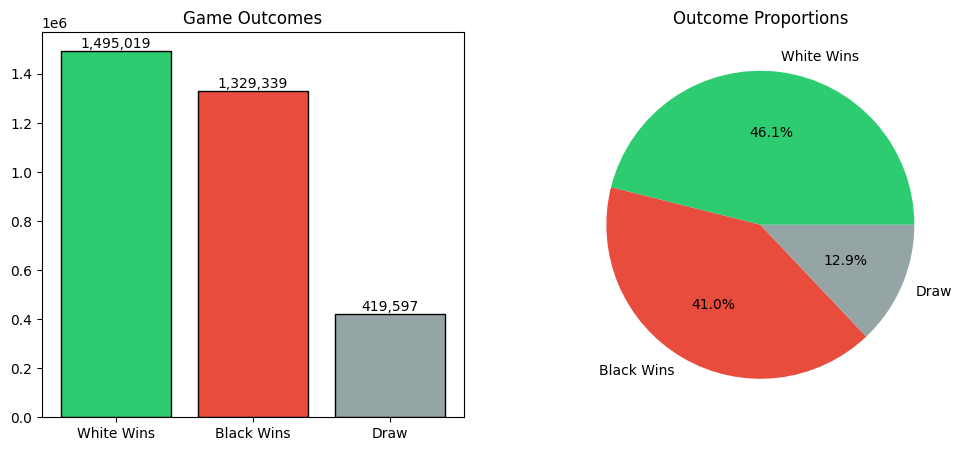

In [6]:
# Count results
counts = df['Result'].value_counts()
labels = ['White Wins', 'Black Wins', 'Draw']
colors = ['#2ecc71', '#e74c3c', '#95a5a6']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart 
axes[0].bar(labels, counts.values, color=colors, edgecolor='black')
axes[0].set_title('Game Outcomes')
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart 
axes[1].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Outcome Proportions')

plt.show()


#### Event type

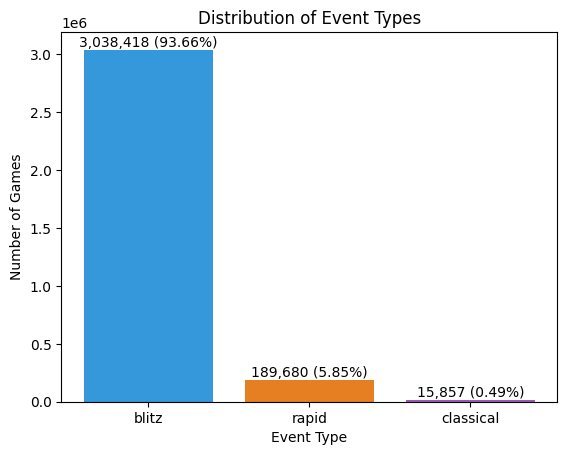

In [7]:
event_counts = df['EventType'].value_counts()
event_pcts = df['EventType'].value_counts(normalize=True) * 100

# Visualization
bars = plt.bar(event_counts.index, event_counts.values,
               color=['#3498db', '#e67e22', '#9b59b6'])

plt.xlabel('Event Type')
plt.ylabel('Number of Games')
plt.title('Distribution of Event Types')

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center", va="bottom"
    )

plt.show()


#### Elo rating 

/tmp/ipykernel_31641/2427650108.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['White Elo', 'Black Elo'])


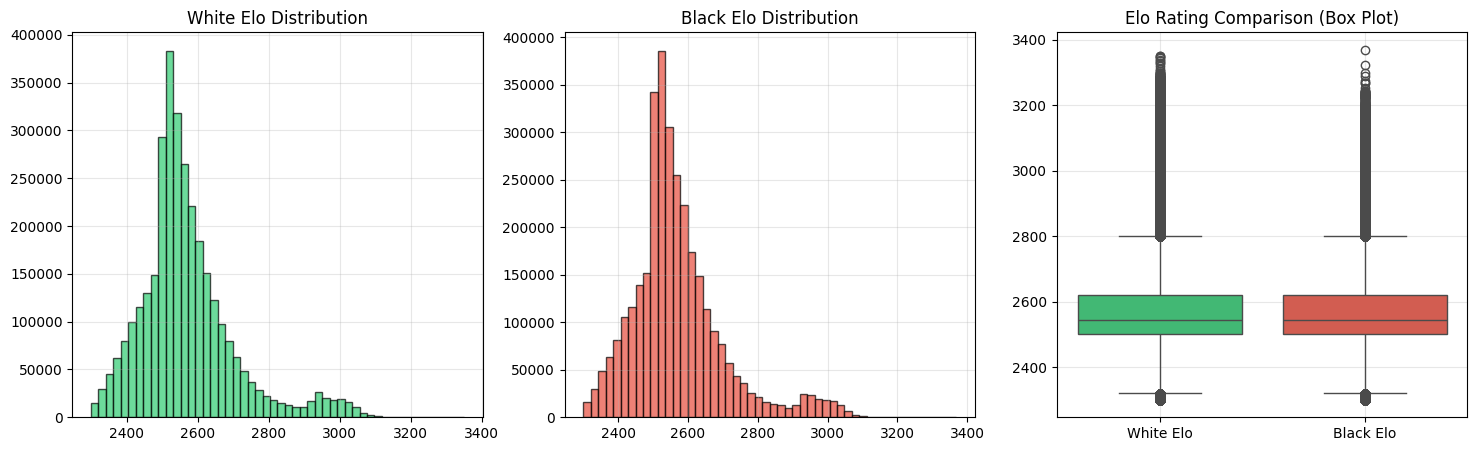

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for White Elo
axes[0].hist(df['WhiteElo'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('White Elo Distribution')
axes[0].grid(alpha=0.3)

# Histogram for Black Elo
axes[1].hist(df['BlackElo'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Black Elo Distribution')
axes[1].grid(alpha=0.3)

# Boxplot comparison
sns.boxplot(data=[df['WhiteElo'], df['BlackElo']],
            palette=['#2ecc71', '#e74c3c'],
            ax=axes[2])
axes[2].set_xticklabels(['White Elo', 'Black Elo'])
axes[2].set_title('Elo Rating Comparison (Box Plot)')
axes[2].grid(alpha=0.3)

plt.show()


#### ECO / Opening


Top 20 Most Common Openings:
   1. A45: 79,631 (2.45%)
   2. A00: 77,169 (2.38%)
   3. D02: 68,678 (2.12%)
   4. B00: 65,914 (2.03%)
   5. B12: 64,480 (1.99%)
   6. A05: 64,250 (1.98%)
   7. A40: 62,472 (1.93%)
   8. A04: 60,201 (1.86%)
   9. B06: 58,392 (1.80%)
  10. B40: 57,261 (1.77%)
  11. B01: 53,227 (1.64%)
  12. A01: 49,708 (1.53%)
  13. A46: 47,622 (1.47%)
  14. D00: 47,618 (1.47%)
  15. C00: 47,404 (1.46%)
  16. B10: 46,203 (1.42%)
  17. B23: 44,829 (1.38%)
  18. B90: 42,807 (1.32%)
  19. B22: 41,795 (1.29%)
  20. B30: 39,756 (1.23%)

Top 20 ECO codes coverage: 34.51% of all games


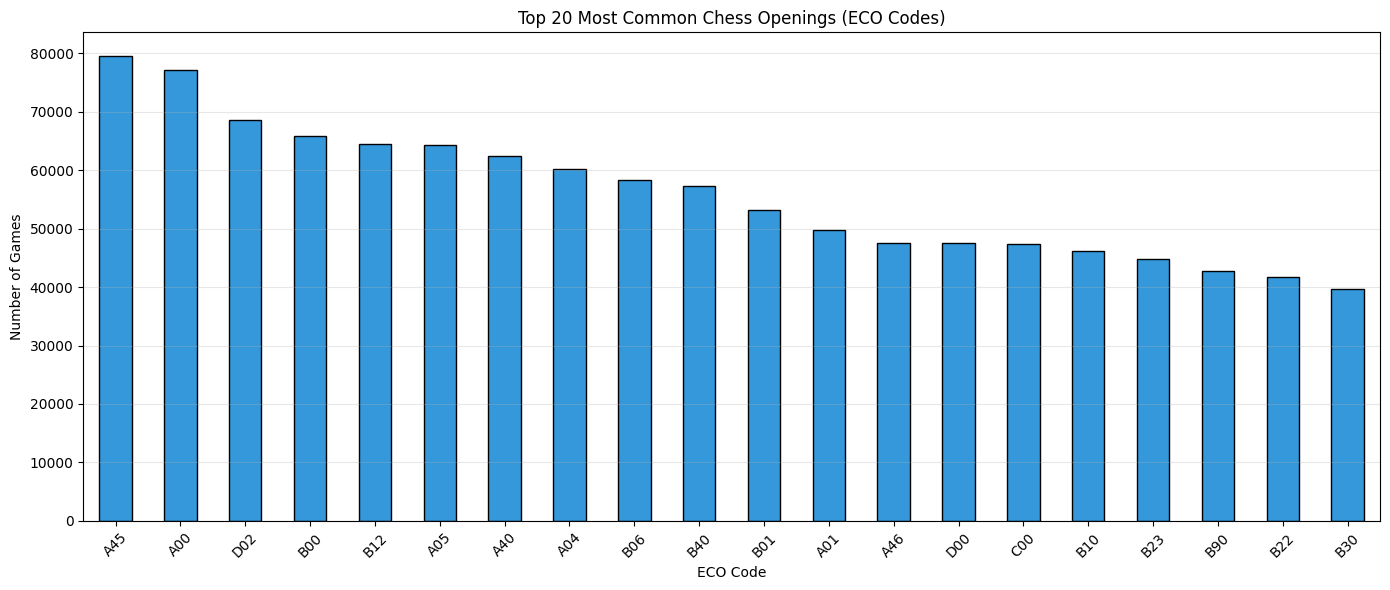

In [9]:
print(f"\nTop 20 Most Common Openings:")
top_20_display = df['ECO'].value_counts().head(20)
for i, (eco, count) in enumerate(top_20_display.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {eco}: {count:,} ({pct:.2f}%)")

# Coverage analysis
top_20_coverage = top_20_display.sum() / len(df) * 100
print(f"\nTop 20 ECO codes coverage: {top_20_coverage:.2f}% of all games")

# Visualization
plt.figure(figsize=(14, 6))
top_20_display.plot(kind='bar', color='#3498db', edgecolor='black')
plt.xlabel('ECO Code')
plt.ylabel('Number of Games')
plt.title('Top 20 Most Common Chess Openings (ECO Codes)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### Initial correlation

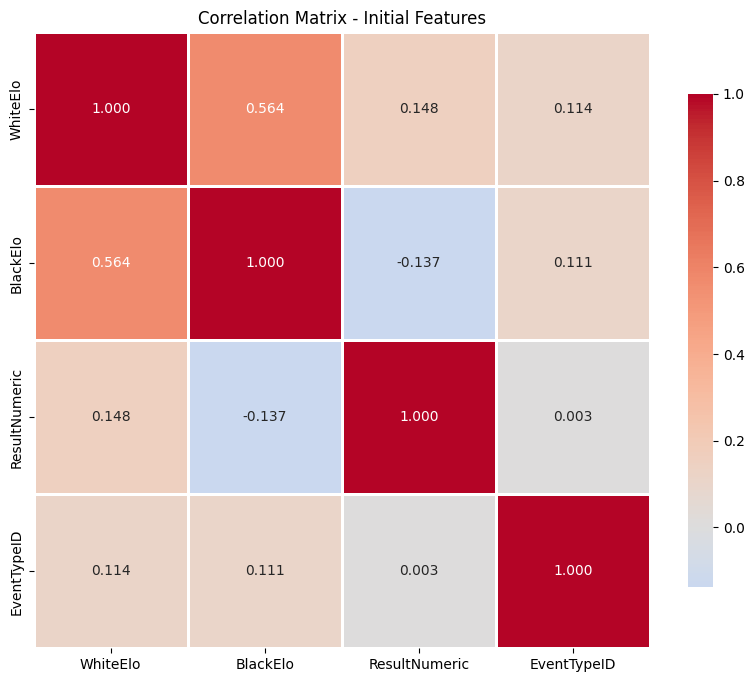

In [10]:
numeric_cols = ['WhiteElo', 'BlackElo', 'ResultNumeric', 'EventTypeID']
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Initial Features')

plt.show()

#### Result by event type

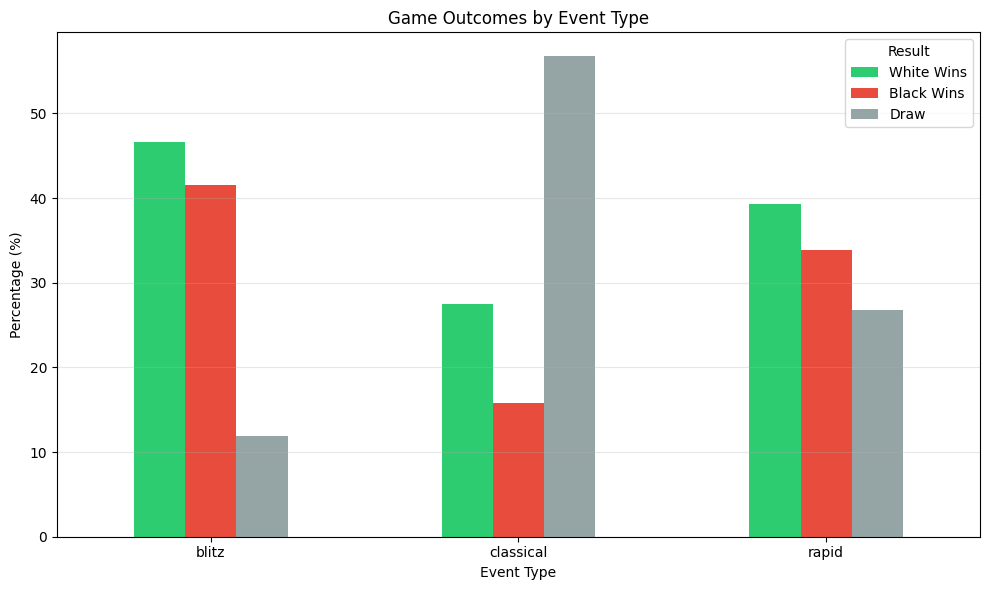

In [11]:
result_by_event = pd.crosstab(df['EventType'], df['Result'], normalize='index') * 100
result_by_event = result_by_event[['1-0', '0-1', '1/2-1/2']]
result_by_event.columns = ['White Wins', 'Black Wins', 'Draw']

# Visualization
result_by_event.plot(kind='bar', stacked=False, figsize=(10, 6),
                     color=['#2ecc71', '#e74c3c', '#95a5a6'])

plt.xlabel('Event Type')
plt.ylabel('Percentage (%)')
plt.title('Game Outcomes by Event Type')
plt.legend(title='Result', labels=['White Wins', 'Black Wins', 'Draw'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Basic feature engineering
create new numeric features for machine learning 

In [12]:
# Rating difference
df['RatingDiff'] = np.abs(df['WhiteElo'] - df['BlackElo'])

# Average rating
df['AvgRating'] = (df['WhiteElo'] + df['BlackElo']) / 2

# Indicator if White is higher rated (binary)
df['WhiteIsHigherRated'] = (df['WhiteElo'] > df['BlackElo']).astype(int)

# Rating advantage (signed - keeps direction)
df['WhiteRatingAdvantage'] = df['WhiteElo'] - df['BlackElo']
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,FirstTenMoves,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,2,0,133,2437.5,1,133
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,1,0,109,2541.5,0,-109
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,1,0,6,2918.0,0,-6
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,2,0,109,2487.5,1,109
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,0,0,185,2565.5,0,-185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243950,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...,1,0,10,2660.0,1,10
3243951,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,2,0,88,2493.0,1,88
3243952,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,0,0,26,2570.0,1,26
3243953,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...,2,0,115,2455.5,1,115


### 4. Opening encoding (ECO)
Since there is almost 500 different ECO, we decide to just use the top 20 most use while the rest will be others.

In [13]:
# Get top 20 ECO codes
top_20_eco = df['ECO'].value_counts().head(20).index.tolist()

# Group less frequent ECO codes into 'Other'
def group_eco(code):
    if code in top_20_eco:
        return code
    return 'Other'

df['ECOGroup'] = df['ECO'].apply(group_eco)
eco_categories = ['Other'] + top_20_eco
df['ECOID'] = df['ECOGroup'].apply(lambda x: eco_categories.index(x))
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,FirstTenMoves,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOGroup,ECOID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,2,0,133,2437.5,1,133,Other,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,1,0,109,2541.5,0,-109,Other,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,1,0,6,2918.0,0,-6,Other,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,2,0,109,2487.5,1,109,B40,10
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,0,0,185,2565.5,0,-185,Other,0


### 5. FirstTenMoves feature engineer

In [14]:
def extract_move_features(moves_str):
    features = {
        # Castling
        'white_castled': 0,
        'black_castled': 0,
        
        # Aggression
        'white_captures': 0,          # Number of captures by White
        'black_captures': 0,          # Number of captures by Black
        
        # Development 
        'white_pawn_moves': 0,
        'black_pawn_moves': 0,
        'white_piece_moves': 0,
        'black_piece_moves': 0,
        
        # Center control 
        'white_center_pawns': 0,      # d4, e4, etc
        'black_center_pawns': 0,
        
        # Quality indicators 
        'white_bishop_developed': 0,  # Bishop moves
        'black_bishop_developed': 0,
        'white_early_queen_out': 0,   # Queen out before move 6
        'black_early_queen_out': 0,
    }
    
    if pd.isna(moves_str) or moves_str == '':
        return pd.Series(features)
    
    tokens = str(moves_str).split()
    tokens = tokens[:20]
    
    white_moves = tokens[0::2]
    black_moves = tokens[1::2]
    
    def analyze_side(moves, side_prefix):
        castled = 0
        captures = 0
        pawn_moves = 0
        piece_moves = 0
        center_pawns = 0
        bishop_dev = 0
        early_queen = 0
        
        for move_num, mv in enumerate(moves, start=1):
            mv_clean = mv.strip().rstrip('+#!?')
            
            if not mv_clean:
                continue
            
            # Castling
            if mv_clean.startswith('O-O'):
                castled = 1
                continue
            
            # Captures
            if 'x' in mv_clean:
                captures += 1
            
            first_char = mv_clean[0]
            
            # Piece moves
            if first_char in ['K', 'Q', 'R', 'B', 'N']:
                piece_moves += 1
                
                # Bishop development
                if first_char == 'B':
                    bishop_dev += 1
                
                # Early queen (bad sign if before move 6)
                if first_char == 'Q' and move_num <= 5:
                    early_queen = 1
                    
            # Pawn moves
            elif first_char in ['a','b','c','d','e','f','g','h']:
                pawn_moves += 1
                
                # Center pawns (d4, d5, e4, e5, c4, c5, f4, f5)
                if mv_clean[:2] in ['d4','d5','e4','e5','c4','c5','f4','f5']:
                    center_pawns += 1
        
        # Store with clear names
        features[f'{side_prefix}_castled'] = castled
        features[f'{side_prefix}_captures'] = captures
        features[f'{side_prefix}_pawn_moves'] = pawn_moves
        features[f'{side_prefix}_piece_moves'] = piece_moves
        features[f'{side_prefix}_center_pawns'] = center_pawns
        features[f'{side_prefix}_bishop_developed'] = min(bishop_dev, 1)  # Binary: 0 or 1
        features[f'{side_prefix}_early_queen_out'] = early_queen
    
    analyze_side(white_moves, 'white')
    analyze_side(black_moves, 'black')
    
    return pd.Series(features)

# Apply feature extraction
move_features = df['FirstTenMoves'].apply(extract_move_features)

# Concatenate
df = pd.concat([df, move_features], axis=1)
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,FirstTenMoves,...,white_pawn_moves,black_pawn_moves,white_piece_moves,black_piece_moves,white_center_pawns,black_center_pawns,white_bishop_developed,black_bishop_developed,white_early_queen_out,black_early_queen_out
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,...,5,5,4,4,2,2,1,1,0,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,...,4,6,5,3,2,1,1,1,0,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,...,4,5,5,4,2,1,1,1,0,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,...,2,5,7,5,2,1,1,1,0,0
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,...,2,3,7,6,2,1,1,1,0,0


### 6. Remove unneeded columns

In [15]:
# 'Event', 'EventType', 'Result','ECO' and 'ECOGroup' can be drop because there is 'EventTypeID', 'ECOID', 'ResultNumeric'
# 'Date' is not used for the data since it is just data about time 
# Same with 'White' and 'Black', these are just the username so the data is not used
df = df.drop(['Event', 'Date', 'White', 'Black', 'Result', 'ECO', 'ECOGroup', 'EventType', 'FirstTenMoves'], axis=1)

### 6. Exported featured data
Final check before export into csv

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243955 entries, 0 to 3243954
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   WhiteElo                int64  
 1   BlackElo                int64  
 2   ResultNumeric           int64  
 3   EventTypeID             int64  
 4   RatingDiff              int64  
 5   AvgRating               float64
 6   WhiteIsHigherRated      int64  
 7   WhiteRatingAdvantage    int64  
 8   ECOID                   int64  
 9   white_castled           int64  
 10  black_castled           int64  
 11  white_captures          int64  
 12  black_captures          int64  
 13  white_pawn_moves        int64  
 14  black_pawn_moves        int64  
 15  white_piece_moves       int64  
 16  black_piece_moves       int64  
 17  white_center_pawns      int64  
 18  black_center_pawns      int64  
 19  white_bishop_developed  int64  
 20  black_bishop_developed  int64  
 21  white_early_queen_out   int64  

In [17]:
df.isnull().sum()

WhiteElo                  0
BlackElo                  0
ResultNumeric             0
EventTypeID               0
RatingDiff                0
AvgRating                 0
WhiteIsHigherRated        0
WhiteRatingAdvantage      0
ECOID                     0
white_castled             0
black_castled             0
white_captures            0
black_captures            0
white_pawn_moves          0
black_pawn_moves          0
white_piece_moves         0
black_piece_moves         0
white_center_pawns        0
black_center_pawns        0
white_bishop_developed    0
black_bishop_developed    0
white_early_queen_out     0
black_early_queen_out     0
dtype: int64

In [18]:
df.to_csv('data/chess_games_feature.csv', index=False)